In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


Welcome to JupyROOT 6.10/08


/home/dhruv/alice/sw/ubuntu1604_x86-64/ROOT/v6-10-08-1/lib/ROOT.py:432: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


### Get Data and MC files

In [2]:
#pPb

#4+layers
#MCfile_name = '/home/dhruv/17g6a3_16_1GeV16GeV_4L_allpthat_zv.root'
#MCfile_name = '/home/dhruv/17g6a3_16_noZvCut_1GeV16GeV_4L.root'
#MCfile_name = '/home/dhruv/13b2_16_4L_31bins_1M.root'
#MCfile_name = '/home/dhruv/13b2_16_4L_58bins_3M.root'
#MCfile_name = '/home/dhruv/17g6a3_16_25bins_0GeV30GeV_4L_200Kevents.root'
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L.root'
MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L_Allevents.root'#used for analyssi note
#MCfile_name = '/home/dhruv/13b2_16_10bins_1GeV30GeV_4L_2Mevents.root'
#MCfile_name = '/home/dhruv/13b2_16_25bins_0GeV20GeV_200Kevents.root'
#MCfile_name = '/home/dhruv/13b2_16_25bins_0GeV20GeV_5Mevents.root'
#MCfile_name = '/home/dhruv/13b2_16_25bins_0GeV20GeV_500Kevents_lowptEta.root'
#MCfile_name = '/home/dhruv/13b2_16_25bins_0GeV20GeV_1Mevents_lowptEta.root'
#MCfile_name = '/home/dhruv/13b2_16_10bins_halfGeV20GeV_1Mevents.root'
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_1Mevents.root'
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_10Mevents_noNormalize.root'


#4Layers
#Datafile = ROOT.TFile('/home/dhruv/13b_3runs_pPb_16_58bins_4L.root')
#Datafile = ROOT.TFile('/home/dhruv/13b_3runs_pPb_16_21bins_1GeV30GeV_4L.root')
Datafile_name = '/home/dhruv/fout_16_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'

    
#TPC
#MCfile_name = '/home/dhruv/17g6a3_3_wWeight_pthat1234_1GeV16GeV_all_new.root'
#MCfile_name = '/home/dhruv/17g6a3_3_noZvCut_1GeV16GeV.root'
#MCfile_name = '/home/dhruv/13b2_3_21bins_1GeV30GeV_4L.root'
#MCfile_name = '/home/dhruv/13b2_3_15bins_1GeV16GeV_4L.root'
#MCfile_name = '/home/dhruv/17g6a3_3_25bins_0GeV30GeV_4L_200Kevents.root'
#MCfile_name = '/home/dhruv/13b2_3_21bins_1GeV30GeV_4L_Allevents.root'
#MCfile_name = '/home/dhruv/13b2_3_25bins_0GeV20GeV_5Mevents.root'
#MCfile_name = '/home/dhruv/13b2_3_25bins_0GeV20GeV_1Mevents_lowptEta.root'

#Datafile_name = '/home/dhruv/fout_3_13b_pass4_v1_5run_pPb_1GeV16GeV_trig_pileup_noZV_all_5layers_new.root'
#Datafile_name = '/home/dhruv/fout_3_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'
#Datafile_name = '/home/dhruv/13b_3runs_pPb_3_21bins_1GeV30GeV_4L.root'
#Datafile_name = '/home/dhruv/13b_3runs_pPb_3_15bins_1GeV16GeV_4L.root'
#Datafile_name = '/home/dhruv/fout_3_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'


MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

filedata = ROOT.TFile('/home/dhruv/HEPData_20GeV.root','READ')
published_data = filedata.Get('hTrack_HEP')

### Get response Matrix and plot it, also true/reco ratio

<ROOT.TH2F object ("hCorrelation_cor") at 0x5de4560>
0.0
<ROOT.TH1D object ("hCorrelation_cor_px") at 0x5fd0f80>


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


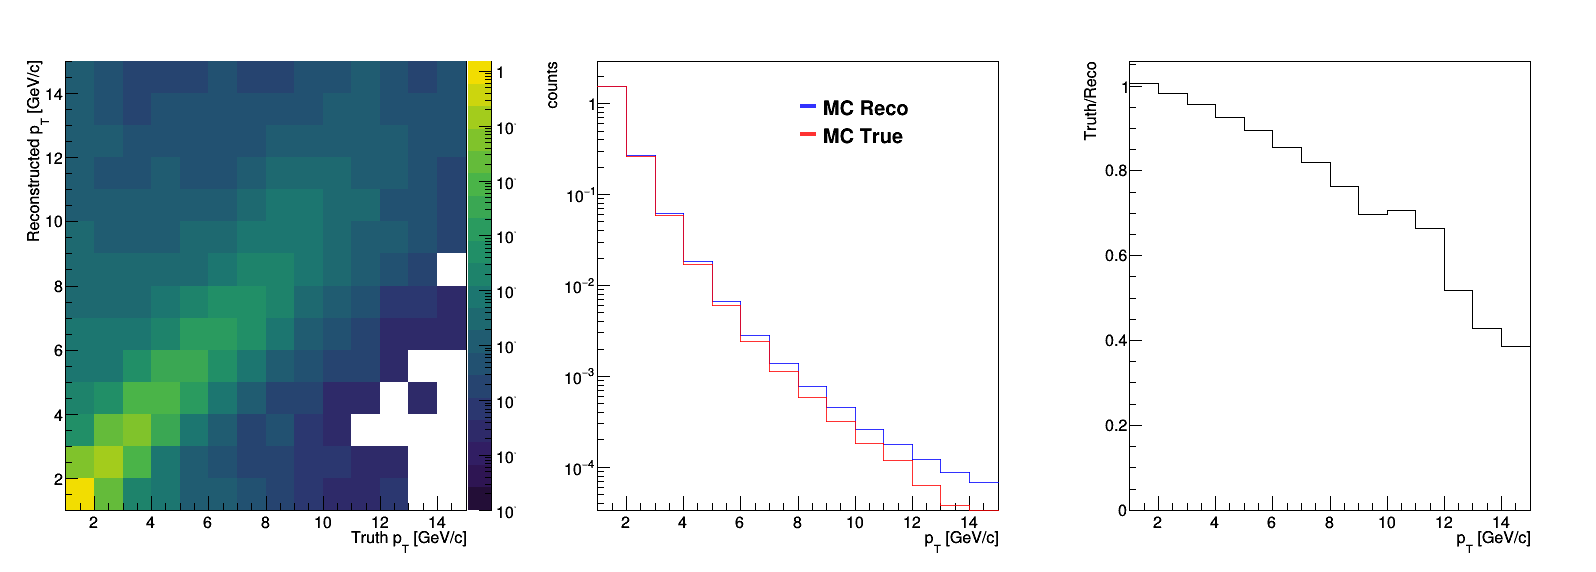

In [3]:
responseMatrix = MCfile.Get("hCorrelation_cor");
print responseMatrix
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
responseMatrix.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix.SetMinimum(1e-7)
        
print responseMatrix.GetBinError(5,6)
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix

responseMatrix.SetMinimum(1e-8)
responseMatrix.GetXaxis().SetRangeUser(1,15)
responseMatrix.GetYaxis().SetRangeUser(1,15)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')
mc_reco.GetXaxis().SetRangeUser(1,15)
mc_truth.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco.Draw('histe')
mc_truth.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth.Draw('histesame')


label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetMinimum(0.0)
ratio_mc.SetLineColor(1)
ratio_mc.SetMarkerStyle(5)
ratio_mc.GetXaxis().SetRangeUser(1,15)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('e')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_1GeV15GeV.png')
#c.SaveAs('reWeighted_response_pPb.png')

#for i in range(ratio_mc.GetNbinsX()+1):
#    low = ratio_mc.GetBinLowEdge(i)
#    center =   ratio_mc.GetBinCenter(i)
#    high = ratio_mc.GetBinLowEdge(i+1)
#    content =  ratio_mc.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

### Get measured track pt spectrum

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


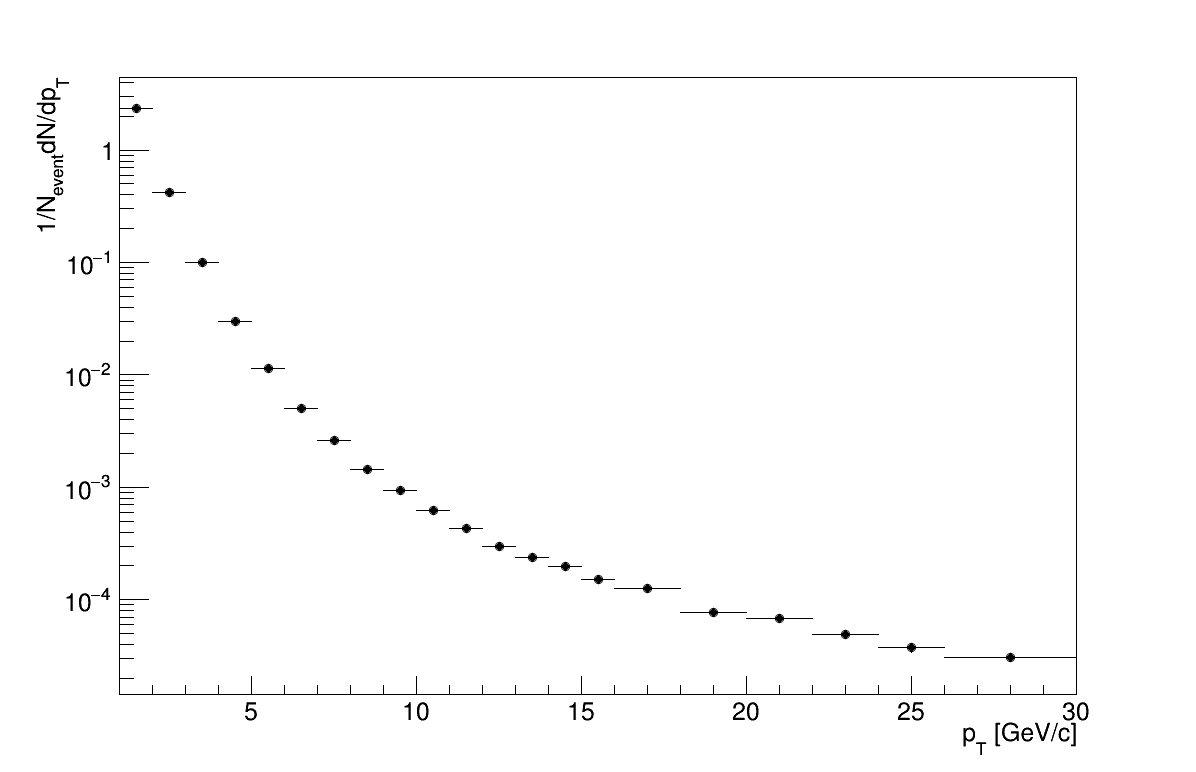

In [4]:
data = Datafile.Get('hReco')
data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
data.GetXaxis().SetRangeUser(1,30)
data.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
numEvents = 659038#747090.0 #pp events
max_eta = 1.6
#data.Scale(1/(numEvents*max_eta))
c = ROOT.TCanvas('c','c',1200,800)
data.Draw()
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_4Layers_pPb_tpc_all_noZ_13c.png')

### Get and plot efficiency and fake rate

-0.380952380952 	0.309523809524 	1.0 	1.0 	0.00067363485839 	0.00067363485839
1.0 	1.5 	2.0 	0.865430116653 	0.00050181806258 	0.000579848162114
2.0 	2.5 	3.0 	0.874018609524 	0.00126682161614 	0.00144942178844
3.0 	3.5 	4.0 	0.878635644913 	0.00269216839765 	0.00306403275719
4.0 	4.5 	5.0 	0.880221486092 	0.00506669809512 	0.00575616271039
5.0 	5.5 	6.0 	0.886657595634 	0.00856427168019 	0.00965905183958
6.0 	6.5 	7.0 	0.886829257011 	0.013468000495 	0.0151866894202
7.0 	7.5 	8.0 	0.885091722012 	0.0195621752654 	0.02210186219
8.0 	8.5 	9.0 	0.873215079308 	0.0266044604481 	0.0304672480796
9.0 	9.5 	10.0 	0.889430880547 	0.0369631568934 	0.0415582117755
10.0 	10.5 	11.0 	0.868852436543 	0.047098273241 	0.0542074479626
11.0 	11.5 	12.0 	0.879999995232 	0.0590165008148 	0.0670642058347
12.0 	12.5 	13.0 	0.839416086674 	0.0750677401502 	0.0894285222096
13.0 	13.5 	14.0 	0.881656825542 	0.0990778644863 	0.112376904047
14.0 	14.5 	15.0 	0.913043498993 	0.123242139584 	0.134979483146
15.0 	

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


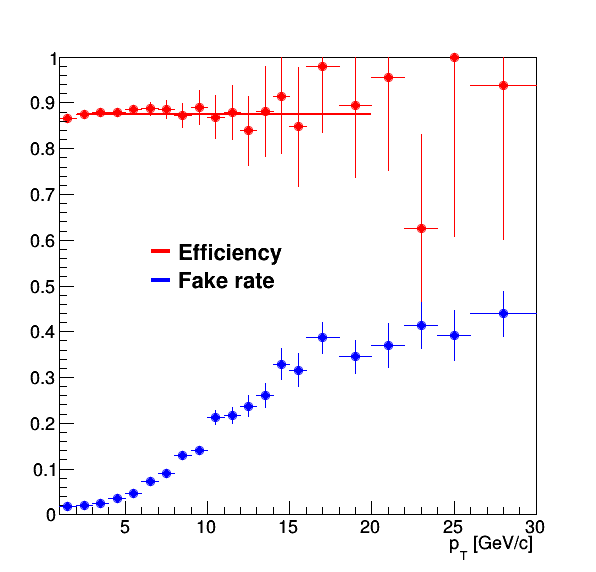

In [5]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(1,30)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 2,20)
efficiency.Draw()
fakerate.Draw('same')

#label = Legend("MC: 13b2_efix_p1")
label = Legend("")
label.Add(efficiency,'Efficiency','L')
label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_1GeV15GeV_lowpt.png')

sum = 0.0
for i in range(efficiency.GetNbinsX()):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    print low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content
    sum += (error/content)**2
    
print sum**(0.5)
#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

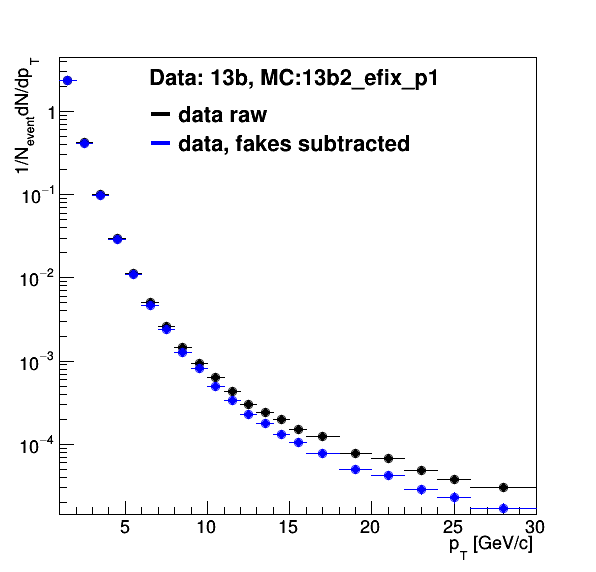

In [6]:
data_bkgsub = data.Clone()
for i in range(1,data_bkgsub.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c.Clear()
data.GetXaxis().SetRangeUser(1,30)
data.Draw('e')
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('esame')
ROOT.gPad.SetLogy()
label = Legend("Data: 13b, MC:13b2_efix_p1")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, fakes subtracted','L')
label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_MBMC_1GeV15GeV.pdf')


### DEFINE DATA FOR UNFOLDING 

In [7]:
data_inputforunfolding = data_bkgsub.Clone()
#data_inputforunfolding = data.Clone()

### Published Data 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


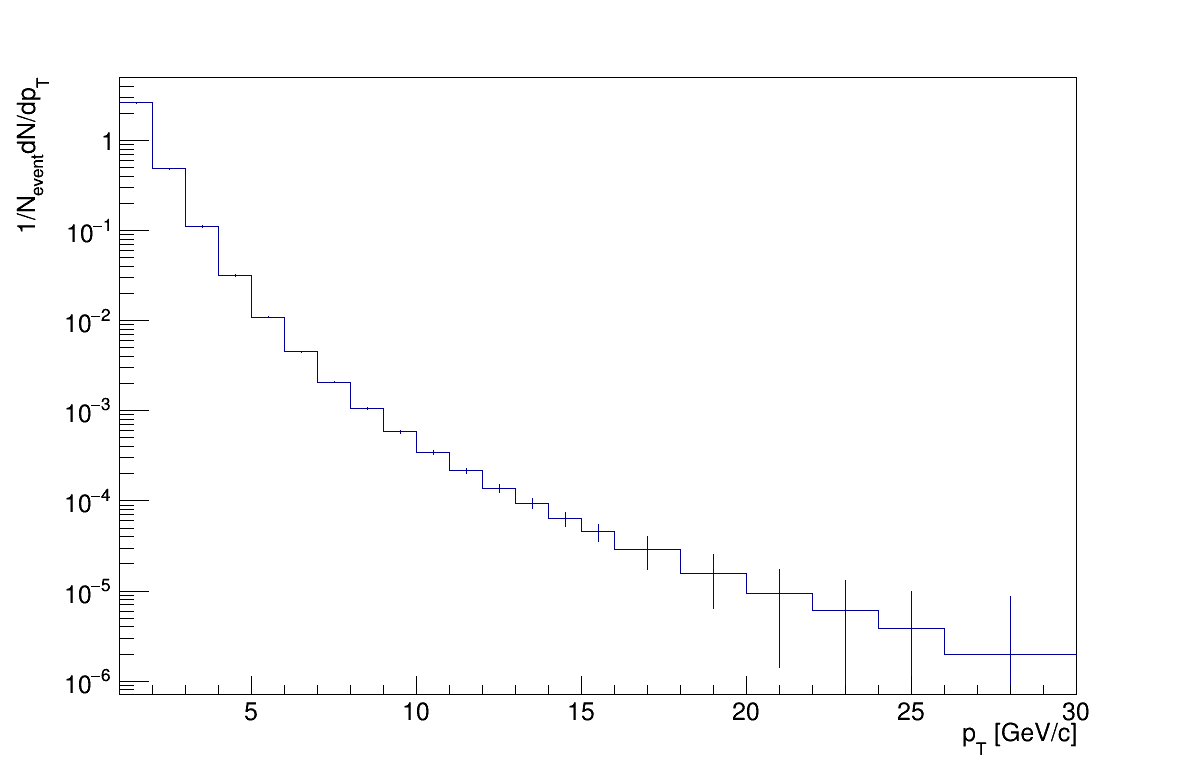

In [8]:
#pPb pubilshed data
###########################################################################################################################
#nbinstrack = 58
#track_bins = np.array([0.15,  0.20,  0.25,  0.30,  0.35,  0.40,  0.45,  0.50,  0.55,  0.60,
#              0.65,  0.70,  0.75,  0.80,  0.85,  0.90,  0.95,  1.00,  1.10,  1.20,
#              1.30,  1.40,  1.50,  1.60,  1.70,  1.80,  1.90,  2.00,  2.20,  2.40,
#              2.60,  2.80,  3.00,  3.20,  3.40,  3.60,  3.80,  4.00,  4.50,  5.00,
#              5.50,  6.00,  6.50,  7.00,  8.00,  9.00,  10.00, 11.00, 12.00, 13.00,
#              14.00, 15.00, 16.00, 18.00, 20.00, 22.00, 24.00, 26.00, 30.00],dtype='float64')
#published_content = [2.56E+01, 2.57E+01, 2.45E+01, 2.26E+01, 2.05E+01, 1.85E+01, 1.67E+01, 1.50E+01, 1.35E+01, 1.21E+01, 
#                     1.09E+01, 9.87E+00, 8.92E+00, 8.06E+00, 7.31E+00, 6.61E+00, 6.00E+00, 5.20E+00, 4.31E+00, 3.58E+00, 
#                     2.98E+00, 2.50E+00, 2.09E+00, 1.75E+00, 1.48E+00, 1.24E+00, 1.05E+00, 8.27E-01, 5.99E-01, 4.38E-01, 
#                     3.21E-01, 2.39E-01, 1.79E-01, 1.34E-01, 1.03E-01, 7.91E-02, 6.16E-02, 4.08E-02, 2.30E-02, 1.37E-02, 
#                     8.38E-03, 5.43E-03, 3.62E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 2.16E-04, 1.39E-04, 9.39E-05, 
#                     6.32E-05, 4.53E-05, 2.86E-05, 1.58E-05, 9.47E-06, 6.10E-06, 3.81E-06, 1.98E-06] 
#published_error = [2.86E-03, 2.07E-03, 1.97E-03, 1.86E-03, 1.74E-03, 1.64E-03, 1.58E-03, 1.54E-03, 1.49E-03, 1.44E-03,
#                   1.40E-03, 1.36E-03, 1.31E-03, 1.26E-03, 1.22E-03, 1.17E-03, 1.12E-03, 7.29E-04, 6.56E-04, 5.92E-04,
#                   5.36E-04, 4.89E-04, 4.45E-04, 4.06E-04, 3.71E-04, 3.39E-04, 3.11E-04, 1.95E-04, 1.65E-04, 1.40E-04,
#                   1.20E-04, 1.03E-04, 8.88E-05, 7.64E-05, 6.70E-05, 5.84E-05, 5.15E-05, 2.64E-05, 1.96E-05, 1.51E-05, 
#                   1.17E-05, 9.42E-06, 7.67E-06, 4.09E-06, 2.90E-06, 2.15E-06, 1.64E-06, 1.30E-06, 1.04E-06, 8.54E-07, 
#                   7.00E-07, 5.93E-07, 3.33E-07, 2.47E-07, 1.92E-07, 1.55E-07, 1.22E-07, 6.22E-08]
###########################################################################################################################
###########################################################################################################################
nbinstrack = 21
track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0,
              26.0, 30.0], dtype='float64')
published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04,
                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05,
                              2.86E-05, 1.58E-05, 9.47E-06, 6.10E-06, 3.81E-06, 
                              1.98E-06], dtype='float64')
published_error = np.array([4.86E-02, 1.08E-02, 2.51E-03, 7.04E-04, 2.16E-04, 
                            9.22E-05, 3.27E-05, 2.61E-05, 2.15E-05, 1.81E-05,
                            1.56E-05, 1.35E-05, 1.20E-05, 1.05E-05, 9.49E-06, 
                            1.13E-05, 9.37E-06, 8.06E-06, 7.12E-06, 6.09E-06, 
                            6.72E-06], dtype='float64')
###########################################################################################################################
######################################################################################################################33
#nbinstrack = 15
#track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
#              11.0, 12.0, 13.0, 14.0, 15.0, 16.0], dtype='float64')
#published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
#                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 
#                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 7.93E-06], dtype='float64')



h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

h.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


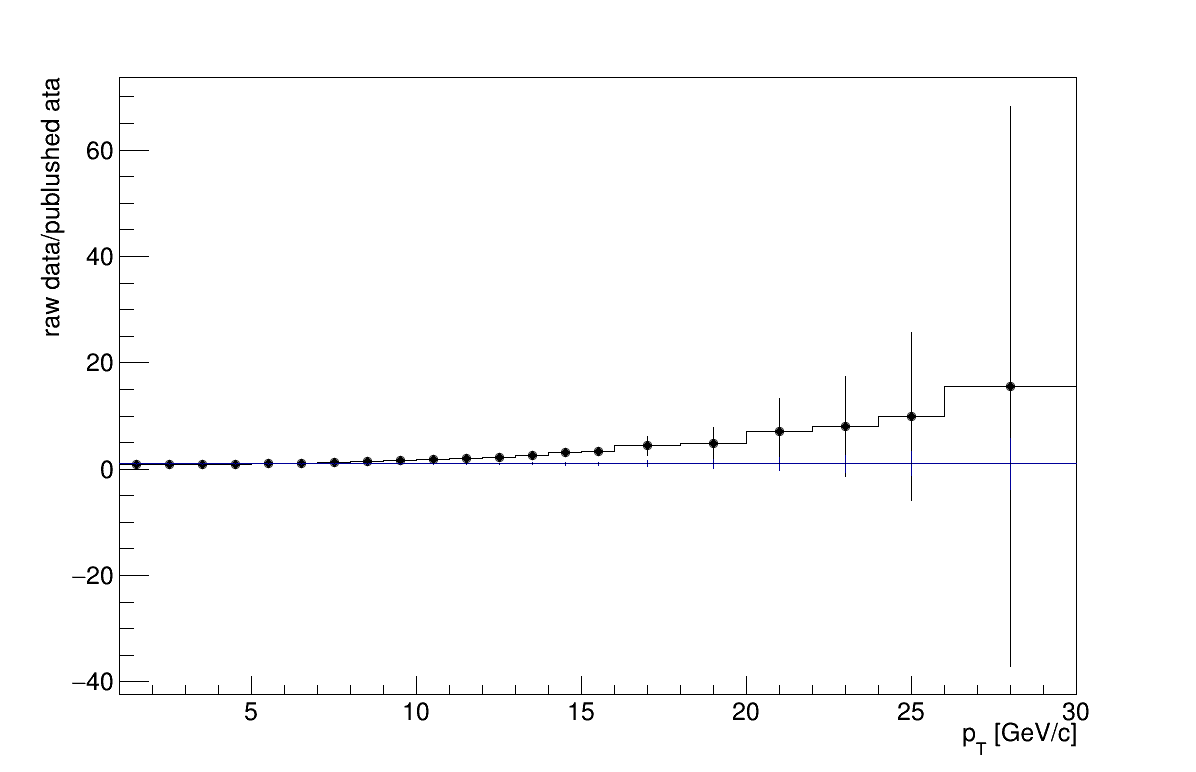

In [9]:
ratio_one = h.Clone()
ratio_one.Divide(h)
ratio_rawPublished = data.Clone()
ratio_rawPublished.Divide(h)

ratio_rawPublished.SetTitle(';p_{T} [GeV/c];raw data/publushed ata')
c= ROOT.TCanvas('c','c',1200,800)
ratio_rawPublished.Draw('histe')
ratio_one.Draw('same')
c.Draw()
#c.SaveAs('ratio_rawPublished_pPb.png')

# Refolding

In [10]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected

for i in range(responseMatrix.GetNbinsX()):
    ySliceSum = float(0.0)
    for j in range(responseMatrix.GetNbinsY()):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        ySliceSum = ySliceSum + tempCont
    #print "ySliceSum = ", ySliceSum, "bin: ", i+1
    for j in range (responseMatrix.GetNbinsY()+1):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        newCont = tempCont/ySliceSum
        responseMatrix.SetBinContent(i+1, j+1, newCont)
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()#data_unfolded['SVD8'].GetNbinsX()


data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(1,N+1):
    temp = 0
    for itruth in range(1,N+1):
        #print responseMatrix.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)
 
integralBins = 1

print h.Integral()
print h_wEff.Integral()
print data_refolded.Integral()


3.26811706105
2.83483158737
2.83483157002


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


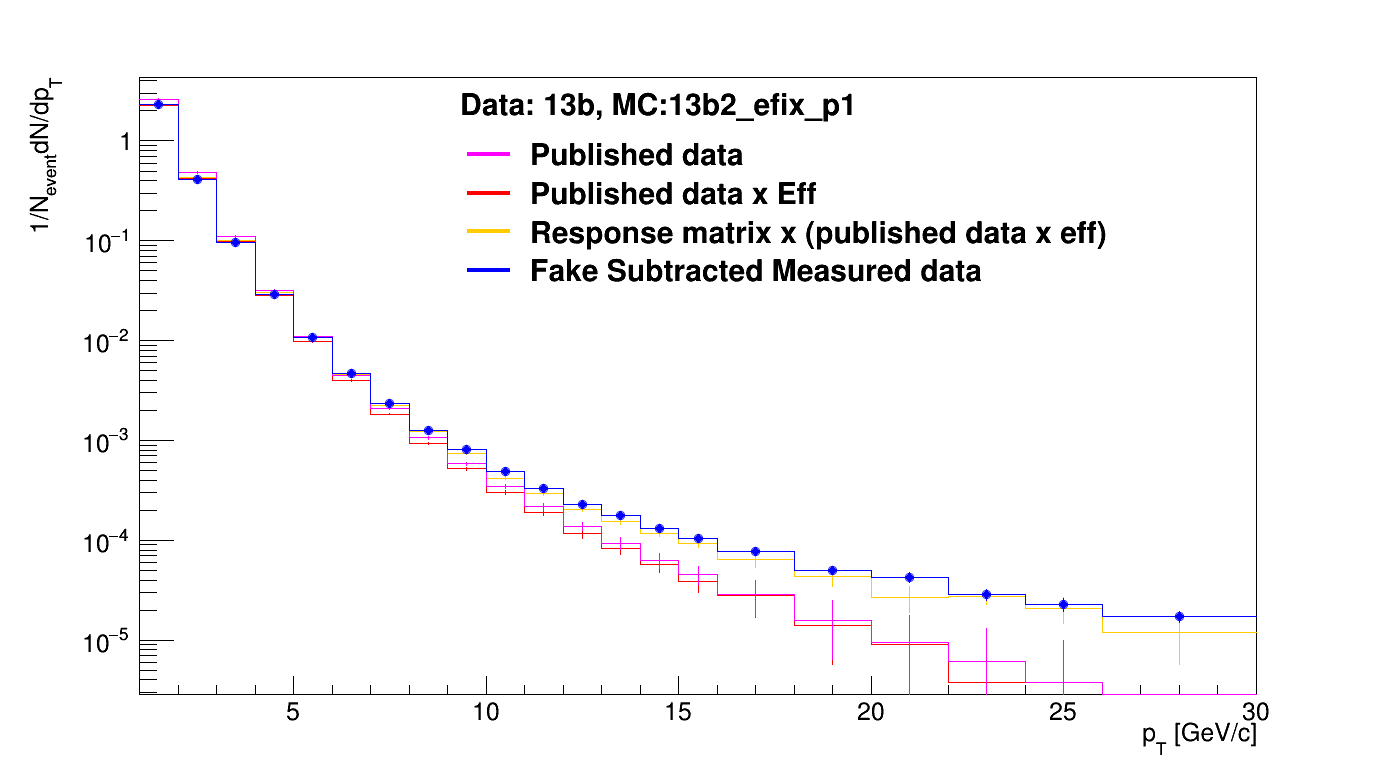

In [11]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.GetXaxis().SetRangeUser(1,30)
data_refolded.Draw('histe')
data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")
h_wEff.Draw('histesame')
h.Draw('histesame')
data_bkgsub.Draw('histesame')


label = Legend("Data: 13b, MC:13b2_efix_p1")
label.Add(h,'Published data','L')
label.Add(h_wEff,'Published data x Eff','L')
label.Add(data_refolded,'Response matrix x (published data x eff)','L')
label.Add(data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_1GeV15GeV.pdf')

In [12]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


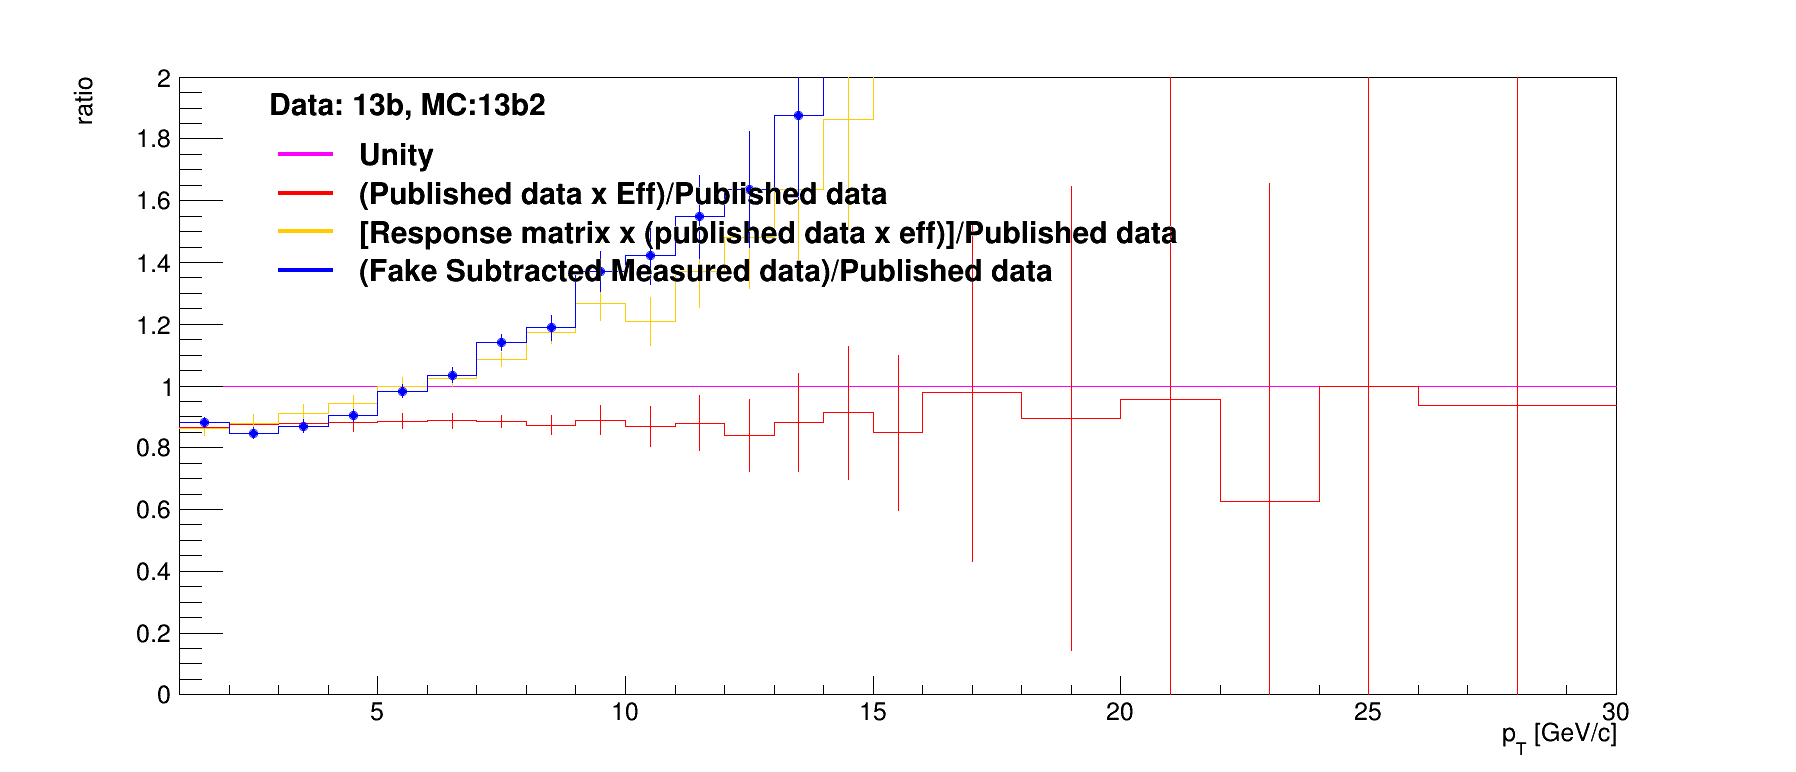

In [13]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
ratio_h.GetXaxis().SetRangeUser(1,30)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

label = Legend("Data: 13b, MC:13b2")
label.Add(ratio_h,'Unity','L')
label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_pink_pPb_13b2.png')

In [14]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

print ratio_refold_pub.Integral()

12.8509327471


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


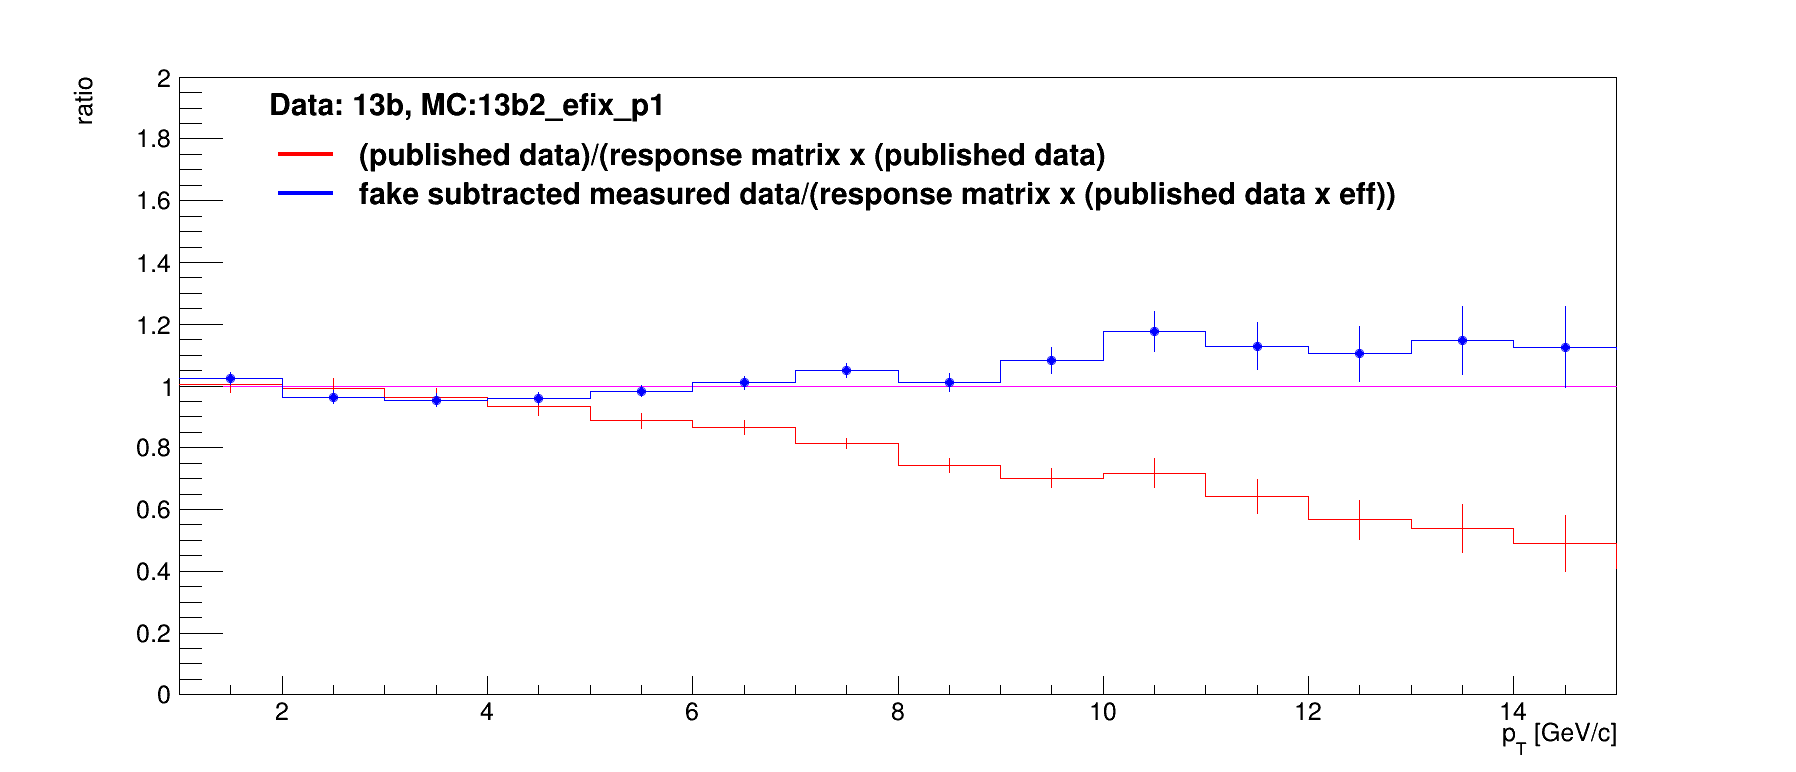

In [16]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
ratio_unity.GetXaxis().SetRangeUser(1,15)
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')

label = Legend("Data: 13b, MC:13b2_efix_p1")
#label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
label.Add(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pPb_its_MBMC_1GeV15GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pPb_its_original.png')

# Eta Phi Comparison

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


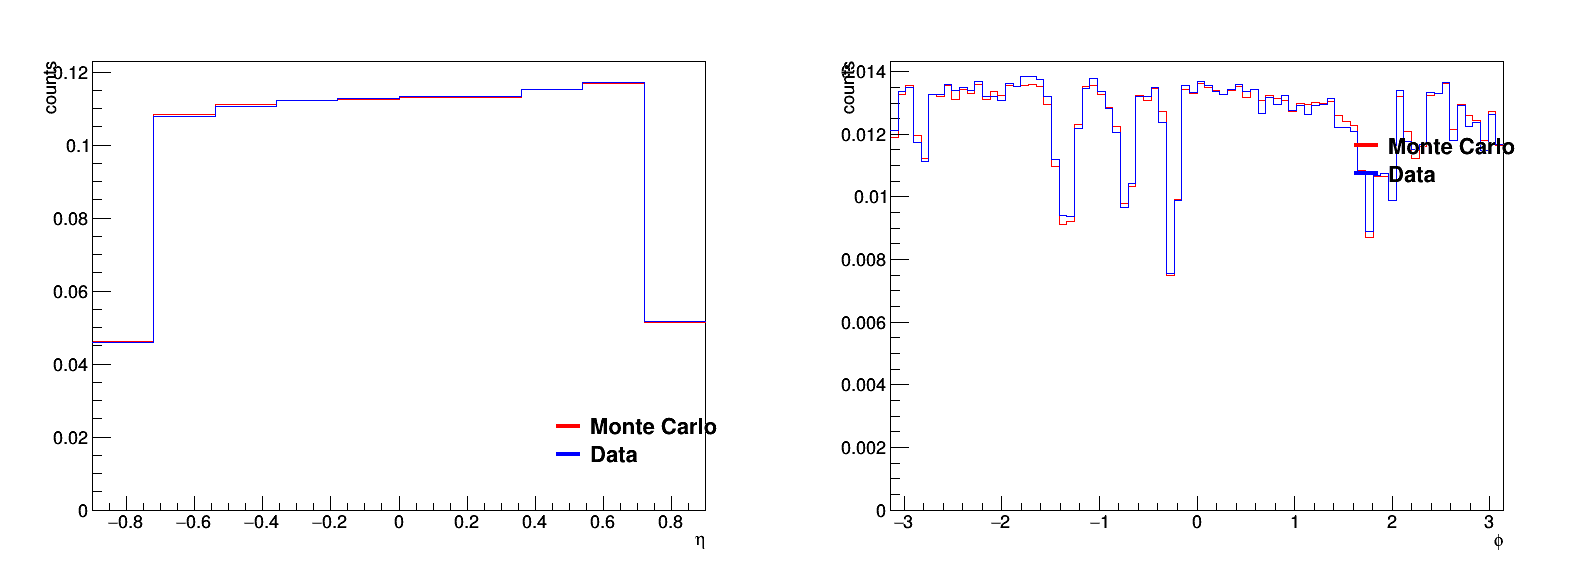

In [29]:
hEtaMC = MCfile.Get('hReco_eta')
hPhiMC = MCfile.Get('hReco_phi')

hEtaData = Datafile.Get('hReco_eta')
hPhiData = Datafile.Get('hReco_phi')

#hEtaMC.Scale(hEtaData.Integral()/hEtaMC.Integral())
#hPhiMC.Scale(hPhiData.Integral()/hPhiMC.Integral())

c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hEtaStack = ROOT.THStack()
hEtaMC.SetLineColor(2)
hEtaMC.SetMarkerColor(2)
hEtaMC.SetMarkerStyle(20)
hEtaData.SetLineColor(4)
hEtaData.SetMarkerColor(4)
hEtaData.SetMarkerStyle(20)
hEtaMC.SetTitle('; #eta; counts')
hEtaData.SetTitle('; #eta; counts')
hEtaMC.SetMinimum(0.0)
hEtaData.SetMinimum(0.0)


#hEtaStack.Add(hEtaMC)
#hEtaStack.Add(hEtaData)
hEtaMC.DrawNormalized('hist')
hEtaData.DrawNormalized('histsame')
label.Add(hEtaMC, 'Monte Carlo','L')
label.Add(hEtaData, 'Data','L')
               
#hEtaStack.SetTitle('; #eta; counts')
#hEtaStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.3)
c.cd(2)

hPhiStack = ROOT.THStack()
label = Legend("")

hPhiStack = ROOT.THStack()
hPhiMC.SetLineColor(2)
hPhiMC.SetMarkerColor(2)
hPhiMC.SetMarkerStyle(20)
hPhiData.SetLineColor(4)
hPhiData.SetMarkerColor(4)
hPhiData.SetMarkerStyle(20)
hPhiMC.SetTitle('; #phi; counts')
hPhiData.SetTitle('; #phi; counts')
hPhiMC.SetMinimum(0.0)
hPhiData.SetMinimum(0.0)

#hPhiStack.Add(hPhiMC)
#hPhiStack.Add(hPhiData)
hPhiMC.DrawNormalized('hist')
hPhiData.DrawNormalized('histsame')
label.Add(hPhiMC, 'Monte Carlo','L')
label.Add(hPhiData, 'Data','L')
               
#hPhiStack.SetTitle('; #phi; counts')
#hPhiStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.8)
c.Draw()
#c.SaveAs("EtaPhi_distribution_pPb.png")

# Eta/Phi Efficiency

80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


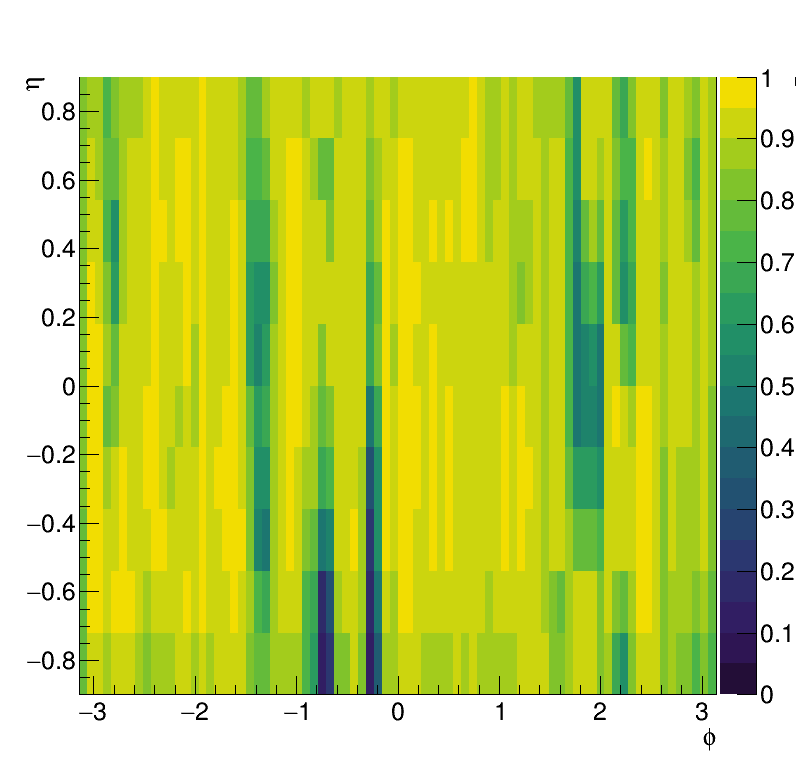

In [30]:
hRecoTruth_etaphi = MCfile.Get('hRecoTruth_phiEta')
hTruth_etaphi = MCfile.Get('hTruth_phiEta')

h2DEff = hRecoTruth_etaphi.Clone()
h2DEff.Divide(hTruth_etaphi)
h2DEff.SetTitle(';#phi;#eta;#epsilon')
#h2DEff.GetZaxis().SetLimits(0.0,1.0)
h2DEff.SetMinimum(0)
h2DEff.SetMaximum(1)

print hRecoTruth_etaphi.GetNbinsX()

c= ROOT.TCanvas('c','c',800,800)

h2DEff.Draw('COLZ')
c.Draw()
#c.SaveAs('etaPhi_eff_tpc.pdf')

80
70.280082047


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


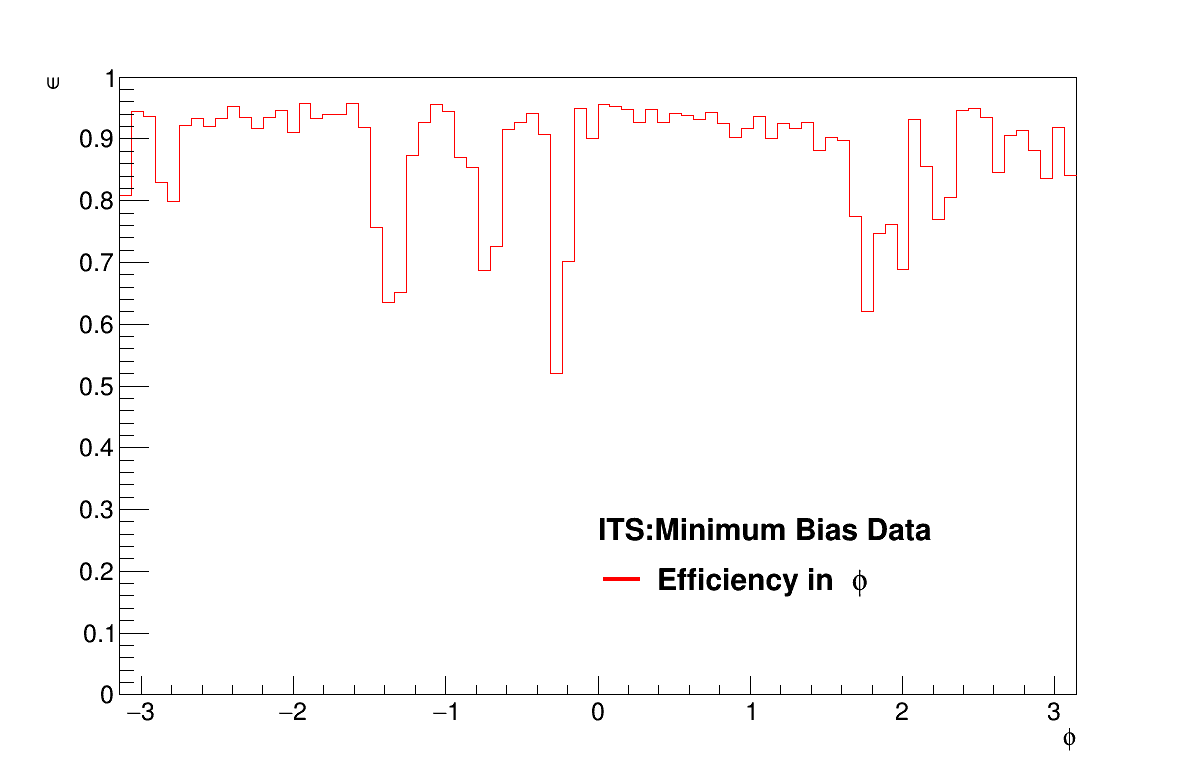

In [33]:
hReco_phi = MCfile.Get('hReco_phi')
hRecoTruth_phi = MCfile.Get('hRecoEmbed_phi')
hTruth_phi = MCfile.Get('hTruth_phi')
hPhi_data = Datafile.Get('hReco_phi')
hPhi_eff = hRecoTruth_phi.Clone()
hPhi_eff.Divide(hTruth_phi)
#hPhi_eff = h2DEff.ProjectionX()

hPhi_data_cor = hPhi_data.Clone()

hPhi_eff.SetMinimum(0)
hPhi_eff.SetMaximum(1)
hPhi_eff.SetTitle(";#phi;#epsilon")
hPhi_eff.SetLineColor(ROOT.kRed)
c= ROOT.TCanvas('c','c',1200,800)
                
hPhi_eff.Draw('hist')
label = Legend(title = 'ITS:Minimum Bias Data')
label.Add(hPhi_eff, 'Efficiency in #phi','L')
label.Draw(0.5,0.3)
c.Draw()
#c.SaveAs('its_phi_eff.pdf')

print hPhi_data.GetNbinsX()
print hPhi_eff.Integral()

for i in range(hPhi_data.GetNbinsX()):
    dPhi = hPhi_data.GetBinWidth(i+1)
    dN = hPhi_data.GetBinContent(i+1)
    dN_dPhi = dN/dPhi
    eff = hPhi_eff.GetBinContent(i+1)
    hPhi_data.SetBinContent(i+1,dN_dPhi)
    hPhi_data_cor.SetBinContent(i+1,dN_dPhi/eff)
    #print dPhi, dN, dN_dPhi, eff

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


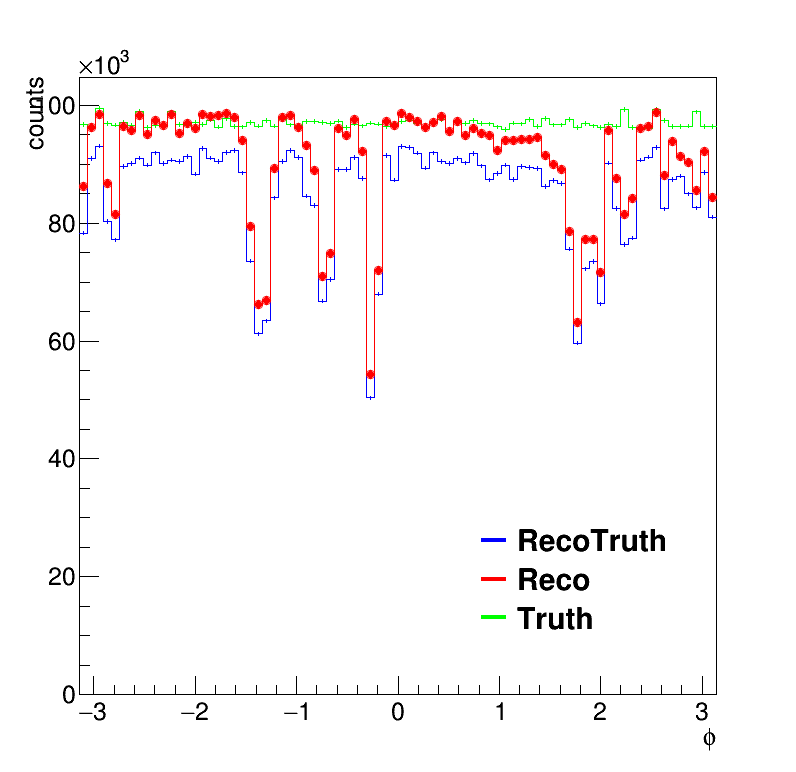

In [34]:
hReco_phi.SetLineColor(ROOT.kRed)
hReco_phi.SetMinimum(0)
hReco_phi.SetTitle(";#phi;counts")
hRecoTruth_phi.SetLineColor(ROOT.kBlue)
hRecoTruth_phi.SetMinimum(0)
hRecoTruth_phi.SetTitle(";#phi;counts")
hTruth_phi.SetLineColor(ROOT.kGreen)
hTruth_phi.SetMinimum(0)
hTruth_phi.SetTitle(";#phi;counts")

c= ROOT.TCanvas('c','c',800,800)
                
#hPhi_eff.Draw('hist')
hTruth_phi.Draw('histe')
hRecoTruth_phi.Draw('histesame')
hReco_phi.Draw('histesame')
label = Legend("")
label.Add(hRecoTruth_phi, 'RecoTruth','L')
label.Add(hReco_phi, 'Reco','L')
label.Add(hTruth_phi, 'Truth','L')
label.Draw(0.6,0.35)
c.Draw()
#c.SaveAs('tpc_phiRT.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file phi_efficiency_cor_its.pdf has been created


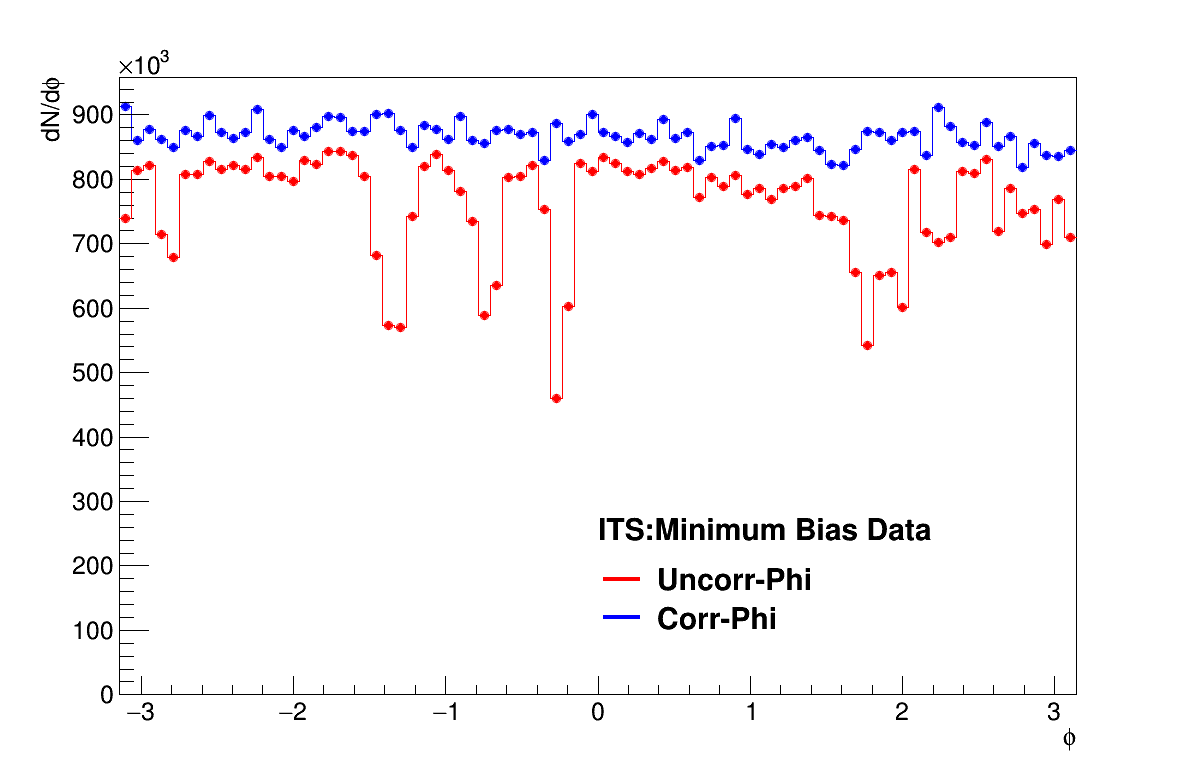

In [36]:
hPhi_data.SetTitle(';#phi;dN/d#phi')
hPhi_data.SetLineColor(ROOT.kRed)
hPhi_data.SetMarkerStyle(20)
hPhi_data.SetMarkerColor(ROOT.kRed)
hPhi_data.SetMinimum(0.0)
hPhi_data_cor.SetTitle(';#phi;dN/d#phi')
hPhi_data_cor.SetLineColor(ROOT.kBlue)
hPhi_data_cor.SetMarkerStyle(20)
hPhi_data_cor.SetMarkerColor(ROOT.kBlue)
hPhi_data_cor.SetMinimum(0.0)

c= ROOT.TCanvas('c','c',1200,800)
hPhi_data_cor.Draw('histe')
hPhi_data.Draw('histesame')

label = Legend(title = 'ITS:Minimum Bias Data')
label.Add(hPhi_data, 'Uncorr-Phi','L')
label.Add(hPhi_data_cor, 'Corr-Phi','L')
label.Draw(0.5,0.3)

c.Draw()
#c.SaveAs('phi_efficiency_cor_its.pdf')

10
8.61232203245

****************************************
Minimizer is Linear
Chi2                      =      42.8006
NDf                       =            9
p0                        =     0.861869   +/-   0.000454938 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file its_eta_eff.pdf has been created


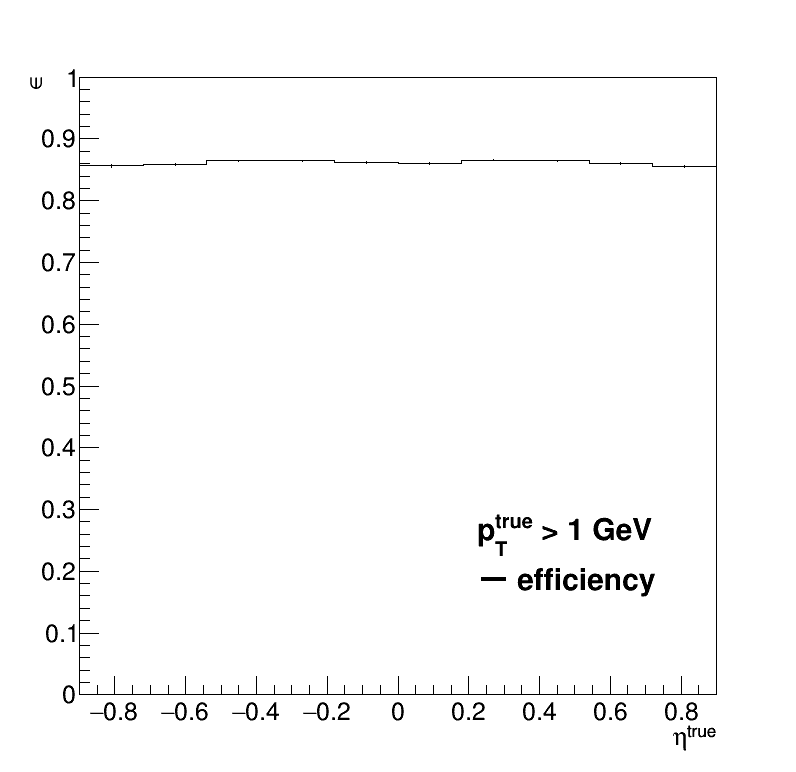

In [18]:
hReco_eta = MCfile.Get('hReco_eta')
hRecoTruth_eta = MCfile.Get('hRecoEmbed_eta')
hTruth_eta = MCfile.Get('hTruth_eta')
heta_data = Datafile.Get('hReco_eta')
heta_eff = hRecoTruth_eta.Clone()
heta_eff.Divide(hTruth_eta)
#heta_eff = h2DEff.ProjectionX()

heta_data_cor = heta_data.Clone()

heta_eff.SetMinimum(0)
heta_eff.SetMaximum(1)
heta_eff.SetTitle(";#eta^{true};#epsilon")
heta_eff.SetLineColor(ROOT.kBlack)
c= ROOT.TCanvas('c','c',800,800)

label = Legend("p_{T}^{true} > 1 GeV")
label.Add(heta_eff, 'efficiency','L')
                
heta_eff.Draw('histe')
heta_eff.Fit('pol0')
label.Draw(0.6,0.3)
c.Draw()
c.SaveAs('its_eta_eff.pdf')

print heta_data.GetNbinsX()
print heta_eff.Integral()

#for i in range(heta_data.GetNbinsX()):
#    deta = heta_data.GetBinWidth(i+1)
#    dN = heta_data.GetBinContent(i+1)
#    dN_deta = dN/deta
#    eff = heta_eff.GetBinContent(i+1)
#    heta_data.SetBinContent(i+1,dN_deta)
#    heta_data_cor.SetBinContent(i+1,dN_deta/eff)
#    #print deta, dN, dN_deta, eff

# ITS Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ITS_resolution.pdf has been created


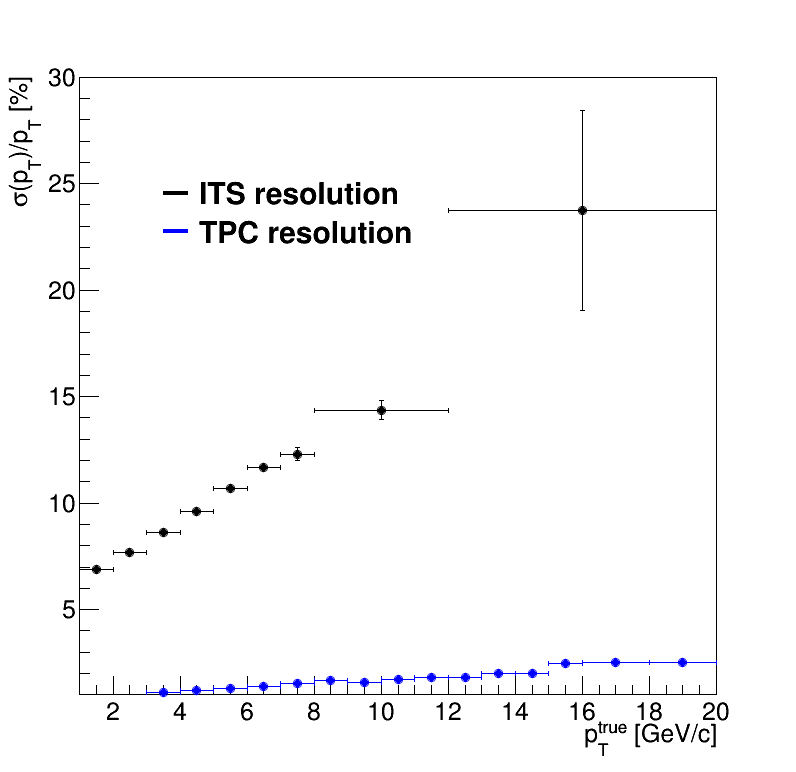

In [48]:
MCfile_4L = ROOT.TFile('/home/dhruv/13b2_16_10bins_1GeV30GeV_4L_2Mevents.root')
#MCfile_5L = ROOT.TFile('/home/dhruv/17g6a3_16_1GeV16GeV__5layers_Res_new.root')
MCfile_tpc = ROOT.TFile('/home/dhruv/13b2_3_21bins_1GeV30GeV_4L_Allevents.root')

res_4L = MCfile_4L.Get('g_sigma')
res_4L.SetLineColor(ROOT.kBlack)
res_4L.SetMarkerColor(ROOT.kBlack)
res_4L.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')
res_4L.SetMarkerStyle(20)
#res_5L = MCfile_5L.Get('g_sigma')
#res_5L.SetLineColor(ROOT.kRed)

res_tpc = MCfile_tpc.Get('g_sigma')
res_tpc.SetLineColor(ROOT.kBlue)
res_tpc.SetMarkerColor(ROOT.kBlue)
res_tpc.SetMarkerStyle(20)

res_4L.SetMinimum(0.0)
res_4L.GetXaxis().SetLimits(1.0,20.0)
res_4L.GetYaxis().SetRangeUser(1.0, 30.0)
res_4L.SetTitle('')
c= ROOT.TCanvas('c','c',800,800)

res_4L.Draw('ap')
#res_5L.Draw('same')
res_tpc.Draw('same p')

label = Legend("")
label.Add(res_4L, 'ITS resolution','L')
#label.Add(res_5L, 'ITS 5layer resolution','L')
label.Add(res_tpc, 'TPC resolution','L')
label.Draw(.2, .8)

c.Draw()
#c.SaveAs('ITS_resolution.pdf')
#c.SaveAs('ITS_resolution_30GeV.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file gaussianReso_tpc.pdf has been created


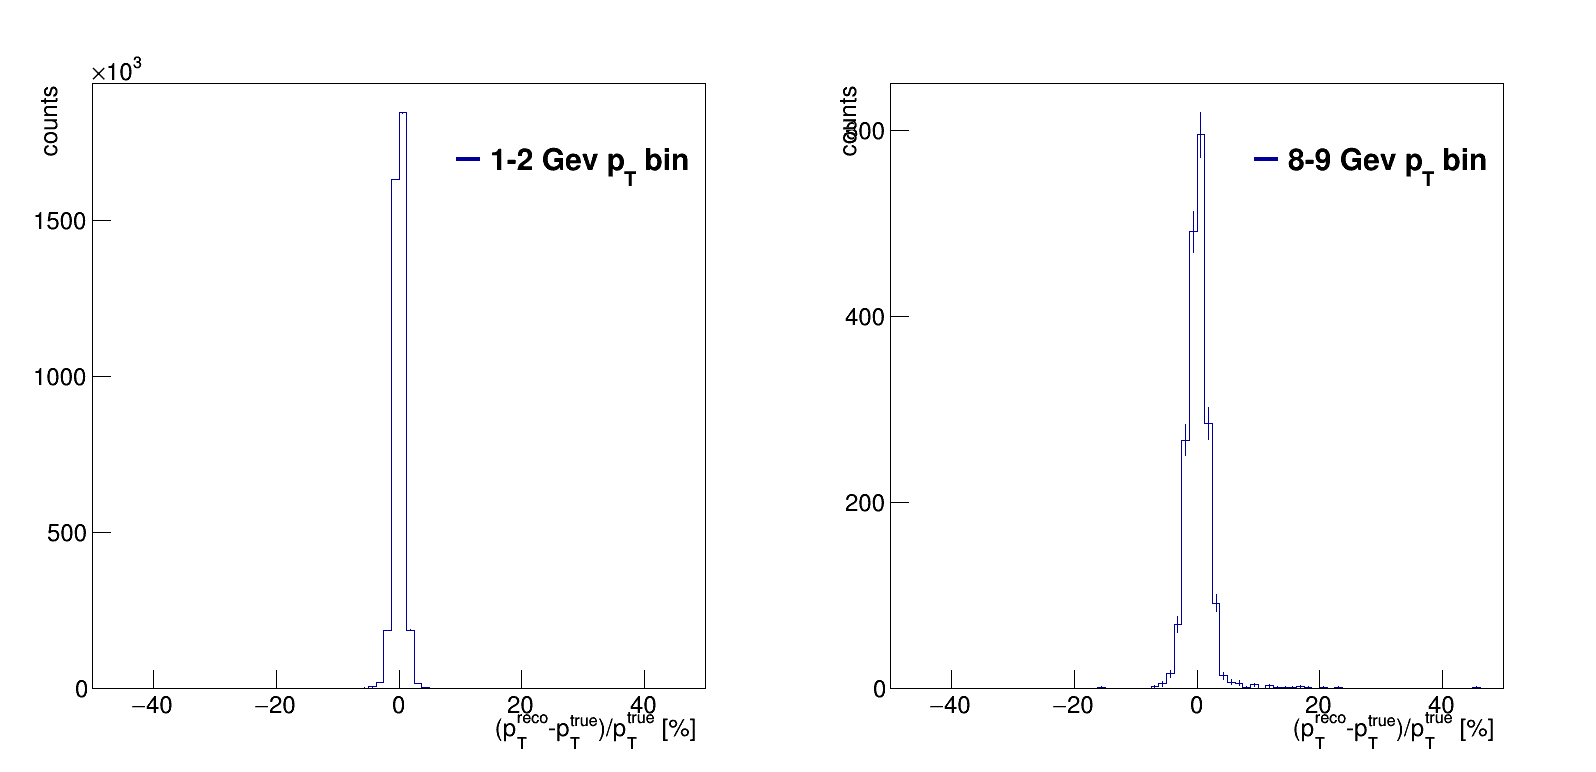

In [69]:
resProj = ROOT.TFile('/home/dhruv/projections_13b2_3_21bins_1GeV30GeV_2M_ResCut.root')
#resProj = ROOT.TFile('/home/dhruv/projections_13b2_21bins_1GeV30GeV_5M_ResCut.root')
resProj_1GeV2GeV = resProj.Get('trackResProjection0_13b2_TrackBit3')
resProj_8GeV9GeV = resProj.Get('trackResProjection7_13b2_TrackBit3')
#resProj_8GeV9GeV.Rebin(2)

c= ROOT.TCanvas('c','c',1600,800)
c.Divide(2,1)
c.cd(1)
resProj_1GeV2GeV.Draw('histe')
label = Legend("")
label.Add(resProj_1GeV2GeV, '1-2 Gev p_{T} bin','L')
label.Draw(0.57,0.85)

c.cd(2)
resProj_8GeV9GeV.Draw('histe')
label = Legend("")
label.Add(resProj_8GeV9GeV, '8-9 Gev p_{T} bin','L')
label.Draw(0.57,0.85)
c.Draw()
c.SaveAs('gaussianReso_tpc.pdf')

# Eta Efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


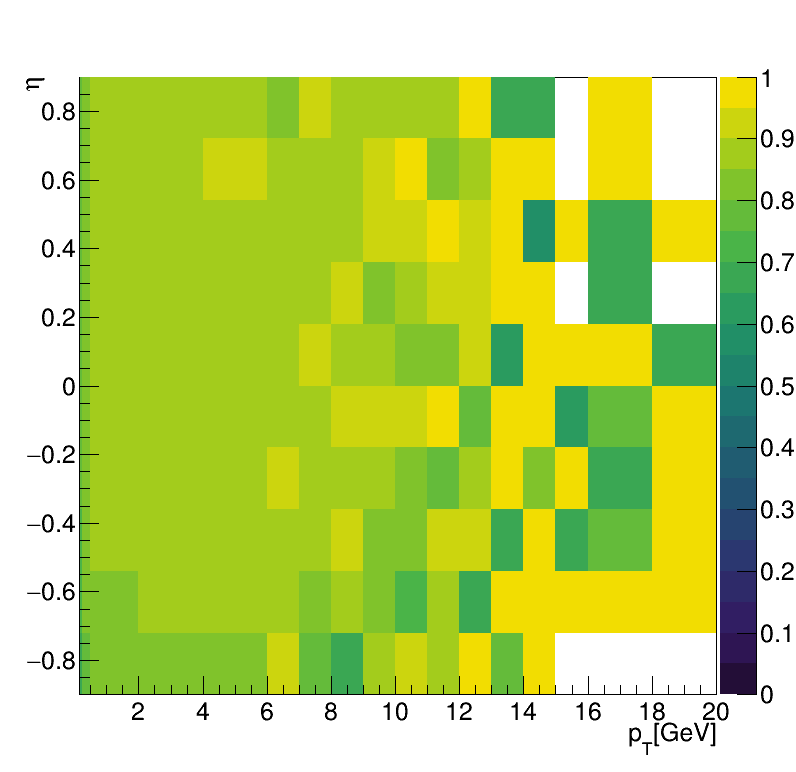

In [47]:
hRecoTruth_ptEta = MCfile.Get('hRecoTruth_ptEta')
hTruth_ptEta = MCfile.Get('hTruth_ptEta')
ptEtaEff = hRecoTruth_ptEta.Clone()
ptEtaEff.Divide(hTruth_ptEta)
ptEtaEff.SetTitle(';p_{T}[GeV];#eta')
ptEtaEff.GetZaxis().SetRangeUser(0,1)
ptEtaEff.GetXaxis().SetRangeUser(0.15,20)
c= ROOT.TCanvas('c','c',800,800)
ptEtaEff.Draw("colz")
c.Draw()
#c.SaveAs('ptEtaEff.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file etaEff_diffpt.pdf has been created


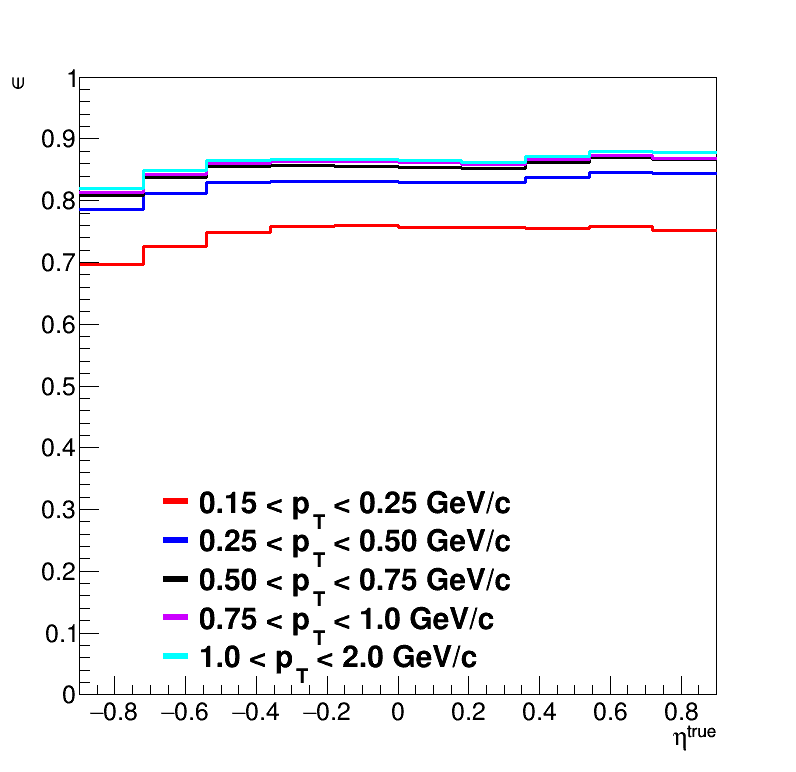

In [49]:
etaEff_bin1 = ptEtaEff.ProjectionY('etaEff_bin1', 1,1)
etaEff_bin1.SetTitle(';#eta^{true};#epsilon')
etaEff_bin1.SetLineColor(ROOT.kRed)
etaEff_bin1.SetLineWidth(3)
etaEff_bin1.SetMinimum(0.0)
etaEff_bin1.SetMaximum(1.0)

etaEff_bin2 = ptEtaEff.ProjectionY('etaEff_bin2', 2,2)
etaEff_bin2.SetLineColor(ROOT.kBlue)
etaEff_bin2.SetLineWidth(3)

etaEff_bin3 = ptEtaEff.ProjectionY('etaEff_bin3', 3,3)
etaEff_bin3.SetLineColor(ROOT.kBlack)
etaEff_bin3.SetLineWidth(3)

etaEff_bin4 = ptEtaEff.ProjectionY('etaEff_bin4', 4,4)
etaEff_bin4.SetLineColor(ROOT.kViolet)
etaEff_bin4.SetLineWidth(3)

etaEff_bin5 = ptEtaEff.ProjectionY('etaEff_bin5', 5,5)
etaEff_bin5.SetLineColor(ROOT.kCyan)
etaEff_bin5.SetLineWidth(3)

c= ROOT.TCanvas('c','c',800,800)

etaEff_bin1.Draw('histe')
etaEff_bin2.Draw('histesame')
etaEff_bin3.Draw('histesame')
etaEff_bin4.Draw('histesame')
etaEff_bin5.Draw('histesame')

label = Legend("")
label.Add(etaEff_bin1, '0.15 < p_{T} < 0.25 GeV/c','L')
label.Add(etaEff_bin2, '0.25 < p_{T} < 0.50 GeV/c','L')
label.Add(etaEff_bin3, '0.50 < p_{T} < 0.75 GeV/c','L')
label.Add(etaEff_bin4, '0.75 < p_{T} < 1.0 GeV/c','L')
label.Add(etaEff_bin5, '1.0 < p_{T} < 2.0 GeV/c','L')

label.Draw(.2, .4)

c.Draw()
#c.SaveAs("etaEff_diffpt.png")
#c.SaveAs("etaEff_diffpt.pdf")


****************************************
Minimizer is Linear
Chi2                      =      117.264
NDf                       =            8
p0                        =     0.867596   +/-   0.000372723 

****************************************
Minimizer is Linear
Chi2                      =      10.2069
NDf                       =            6
p0                        =     0.854548   +/-   0.00136333  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


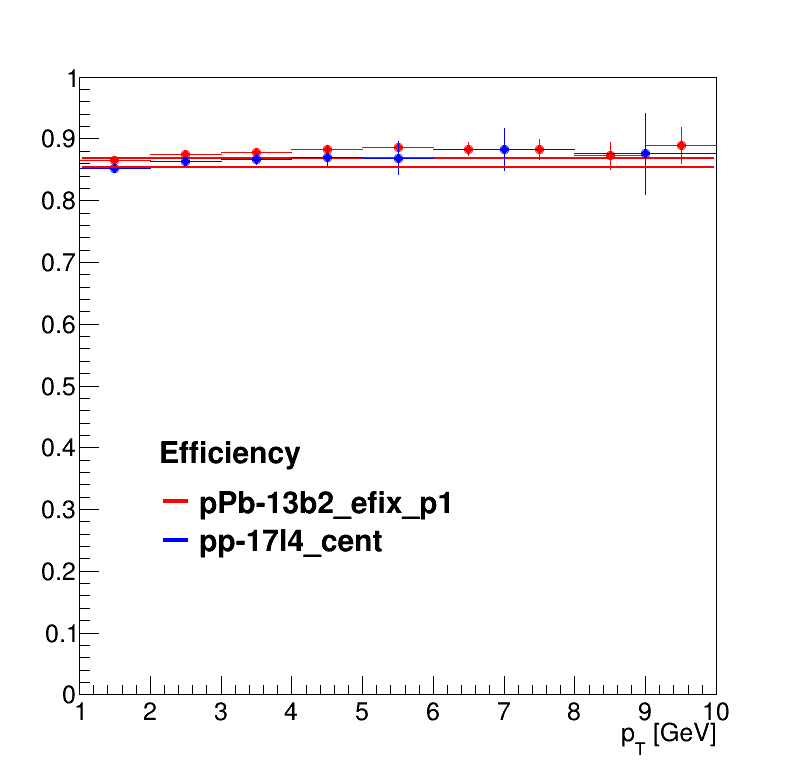

In [15]:
MCfile_pp = ROOT.TFile('/home/dhruv/17l4_16_9bins_1GeV20GeV_4L_Allevents.root')
MCfile_pPb = ROOT.TFile('/home/dhruv/13b2_16_25bins_0GeV20GeV_5Mevents.root')#13b2_16_21bins_1GeV30GeV_4L_Allevents.root')

eff_pPb = MCfile_pPb.Get("hRecoTruth").Clone()
eff_pPb.Divide(MCfile_pPb.Get("hTruth"))
eff_pp = MCfile_pp.Get("hRecoTruth").Clone()
eff_pp.Divide(MCfile_pp.Get("hTruth"))

eff_pPb.SetTitle(' ; p_{T} [GeV];')
eff_pPb.SetMarkerStyle(20)
eff_pPb.SetMarkerColor(ROOT.kRed)
eff_pPb.SetLineColor(ROOT.kRed)
eff_pPb.SetMinimum(0.0)
eff_pPb.SetMaximum(1.0)
eff_pPb.GetXaxis().SetRangeUser(1,10)

eff_pp.SetTitle(' ; p_{T} [GeV];')
eff_pp.SetMarkerStyle(20)
eff_pp.SetMarkerColor(ROOT.kBlue)
eff_pp.SetLineColor(ROOT.kBlue)

c= ROOT.TCanvas('c','c',800,800)

eff_pPb.Draw()
eff_pp.Draw('same')

eff_pPb.Fit('pol0', '', '', 1,10)
eff_pp.Fit('pol0', '', '', 1,10)

label = Legend("Efficiency")
label.Add(eff_pPb, 'pPb-13b2_efix_p1','L')
label.Add(eff_pp, 'pp-17l4_cent','L')

label.Draw(.2, .4)

c.Draw()
#c.SaveAs('ppPb_eff_its.png')
#c.SaveAs('ppPb_eff_its.pdf')

# Z Vertex Ratios

In [1]:
#Datafile_zv = ROOT.TFile('/home/dhruv/fout_3_13b_pass4_v1_3run_pPb_zv_all_new.root')
#MCfile_zv = ROOT.TFile('/home/dhruv/17g6a3_16_1GeV16GeV_all_new.root')

#zv_data = Datafile_zv.Get('hZvertex')
#zv_MC = MCfile_zv.Get('hZvertex')

#zv_corection = zv_MC.clone()
#zv_correction.Divide(zv_data)



In [144]:
response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix)
response.UseOverflow(ROOT.kFALSE)
data_unfolded = {}
#for tau in range(4,6):
#    data_unfolded['SVD%i'%tau] = RooUnfoldSvd(response, data_inputforunfolding, tau).Hreco();

data_unfolded['SVD8'] = RooUnfoldSvd(response, data_inputforunfolding, 12).Hreco();
data_unfolded['SVD9'] = RooUnfoldSvd(response, data_inputforunfolding, 13).Hreco();

print data_unfolded

{'SVD9': <ROOT.TH1D object ("hCorrelation_cor") at 0x6cfd2d0>, 'SVD8': <ROOT.TH1D object ("hCorrelation_cor") at 0x3d45be0>}
Subtract -7.48924e-05 fakes from measured distribution
SVD init 21 x 21 bins, kreg=12
Subtract -7.48924e-05 fakes from measured distribution
SVD init 21 x 21 bins, kreg=13


Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 12
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 98.112447
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 13
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 369.007187


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


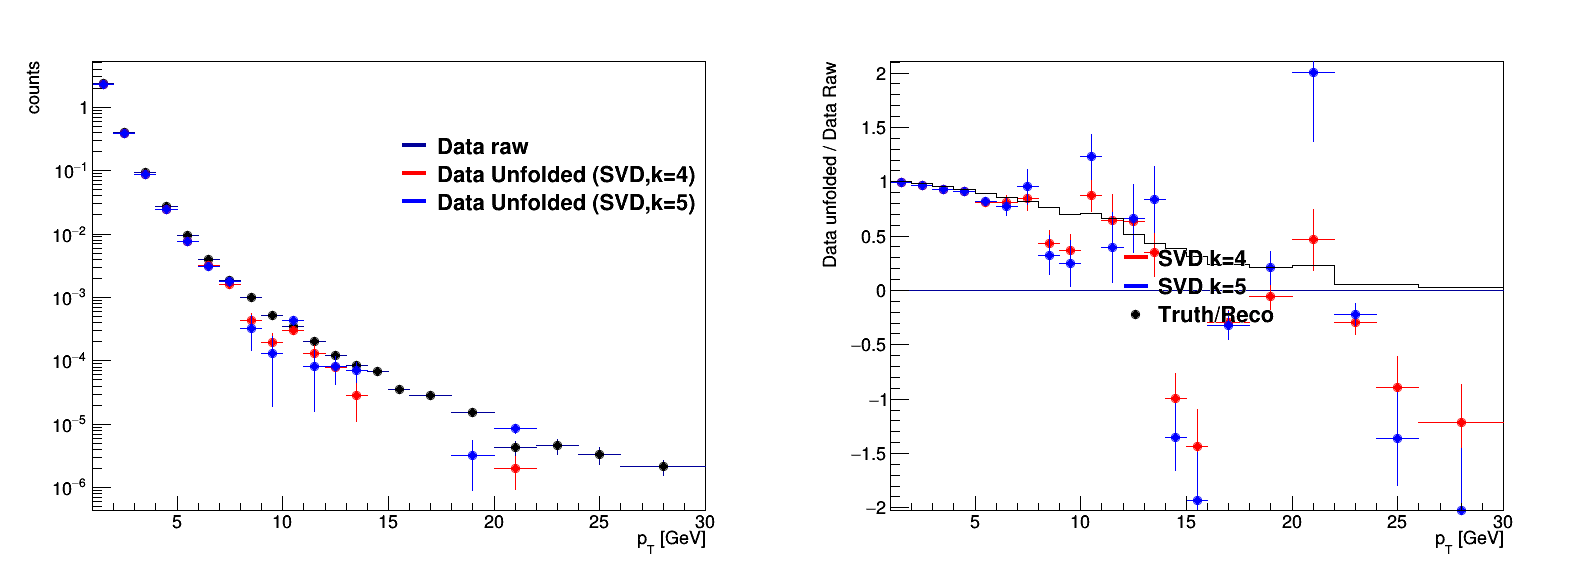

In [145]:
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hstack = ROOT.THStack()
hstack.Add(data)
label.Add(data,'Data raw','L')

data.SetMarkerStyle(20)
data_unfolded['SVD8'].SetLineColor(2)
data_unfolded['SVD8'].SetMarkerColor(2)
data_unfolded['SVD8'].SetMarkerStyle(20)
data_unfolded['SVD9'].SetLineColor(4)
data_unfolded['SVD9'].SetMarkerColor(4)
data_unfolded['SVD9'].SetMarkerStyle(20)

hstack.Add(data_unfolded['SVD8'])
hstack.Add(data_unfolded['SVD9'])
label.Add(data_unfolded['SVD8'], 'Data Unfolded (SVD,k=4)','L')
label.Add(data_unfolded['SVD9'], 'Data Unfolded (SVD,k=5)','L')
               
hstack.SetTitle('; p_{T} [GeV]; counts')
hstack.Draw('nostack')
ROOT.gPad.SetLogy()
label.Draw(.5,.8)
c.cd(2)

hs_ratio = ROOT.THStack()
label = Legend("")

ratio = {}
ratio['SVD8'] = data_unfolded['SVD8'].Clone()
ratio['SVD8'].Divide(data) 
ratio['SVD9'] = data_unfolded['SVD9'].Clone()
ratio['SVD9'].Divide(data) 

hs_ratio.Add( ratio['SVD8'])
hs_ratio.Add( ratio['SVD9'])

label.Add(ratio['SVD8'],'SVD k=4','L')
label.Add(ratio['SVD9'],'SVD k=5','L')

#simple bin-by-bin unfolding
ratio_mc.SetMarkerStyle(20)
ratio_mc.SetMarkerSize(1)
ratio_mc.SetMarkerColor(1)

hs_ratio.Add(ratio_mc)

hs_ratio.SetTitle('; p_{T} [GeV]; Data unfolded / Data Raw')
hs_ratio.Draw('nostack')
label.Add(ratio_mc, 'Truth/Reco','P')
label.Draw(.4,.6)
c.Draw()
#c.SaveAs('Unfoldedresult_tracking_its_4Layers.png')

# Published data

##EFFICIENCY CORRECTION

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


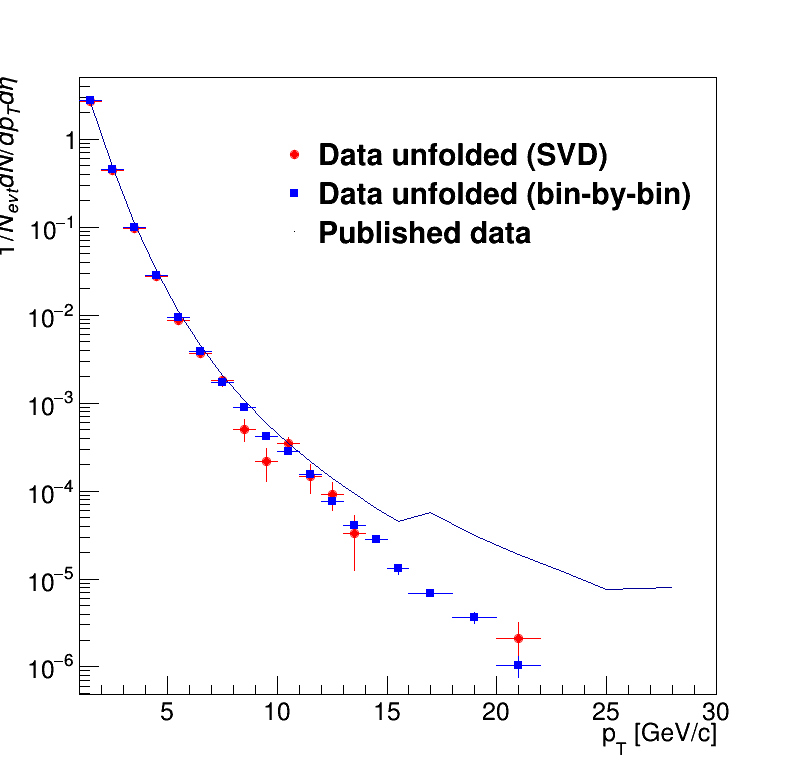

In [146]:
#efficiency.Print()
#applying efficiency
def applyEfficiencyCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)/eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)/eff)
    return histo_corrected


data_unfolded_SVD_4_corrected = applyEfficiencyCorrection(data_unfolded['SVD8'])
data_unfolded_SVD_5_corrected = applyEfficiencyCorrection(data_unfolded['SVD9'])

data_corrected = data.Clone()
data_onlyeff   = data.Clone()

data_corrected.Multiply(ratio_mc) #applying "naive unfolding"
data_onlyeff = applyEfficiencyCorrection(data_onlyeff)


data_corrected= applyEfficiencyCorrection(data_corrected)
c= ROOT.TCanvas('c','c',800,800)
#c.Divide(2)
#c.cd(1)
data_unfolded_SVD_4_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_unfolded_SVD_4_corrected.SetMarkerStyle(20)
data_unfolded_SVD_4_corrected.SetMarkerColor(2)
#data_unfolded_SVD_4_corrected.GetXaxis().SetRangeUser(1,12)
data_unfolded_SVD_4_corrected.Draw()
data_unfolded_SVD_5_corrected.SetMarkerStyle(21)
data_unfolded_SVD_5_corrected.SetMarkerColor(ROOT.kOrange+1)
data_unfolded_SVD_5_corrected.SetLineColor(ROOT.kOrange+1)
#data_unfolded_SVD_5_corrected.Draw('same')
h.Draw('histLsame')
data_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_corrected.SetMarkerColor(4)
data_corrected.SetLineColor(4)
#data_corrected.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_onlyeff.SetLineColor(3)
data_onlyeff.SetMarkerColor(3)
data_onlyeff.SetMarkerStyle(21)
#data_onlyeff.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_corrected.Draw('same')

label = Legend("")
label.Add(data_unfolded_SVD_4_corrected,'Data unfolded (SVD)')
label.Add(data_corrected,'Data unfolded (bin-by-bin)')
#label.Add(data_unfolded_SVD_5_corrected,'Data unfolded (SVD k=5) + eff corr.','L')
label.Add(h,'Published data')
#label.Add(data_onlyeff,'Data + eff corr.','L')
#label.Add(data_corrected,'Data unfolded (bin-by-bin) + eff corr.','L')
label.Draw(.35,.85)

ROOT.gPad.SetLogy()



#c.SaveAs('UnfoldedSpectraAndPublishedResult_tracking_pPb_its_4Layers.png')
c.Draw()

In [147]:
def printHisto(histo):
    values = []
    for i in range(1,histo.GetNbinsX()+1):
        width = histo.GetBinWidth(i)/2.0
        center = histo.GetBinCenter(i)
        content = histo.GetBinContent(i)
        #print '%2.2f--%2.2f = %2.5f, %2.5f' %(center-width,center+width,content, content*width*2.0)
        #print '%2.5f' %(content*width*2.0)
        #print '%2.2f--%2.2f' %(center-width,center+width)
        #print '%2.5f' %(content)
        values.append(content)
    print ' '
    return values


In [148]:
ratio_data_unfolded_SVD_4_corrected = data_unfolded_SVD_4_corrected.Clone()
ratio_data_unfolded_SVD_5_corrected = data_unfolded_SVD_5_corrected.Clone()
ratio_data_corrected                = data_corrected.Clone()
ratio_unity                         = h.Clone()

ratio_data_unfolded_SVD_4_corrected.Divide(h)
ratio_data_unfolded_SVD_5_corrected.Divide(h)
ratio_data_corrected.Divide(h)
ratio_unity.Divide(h)

True

In [149]:
ratio_data_raw = data.Clone()
ratio_data_raw.Divide(h)
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_bkgsub.Divide(h)

ratio_data_unfoldedSVD4 = data_unfolded['SVD8'].Clone()
ratio_data_unfoldedSVD4.Divide(h)


True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


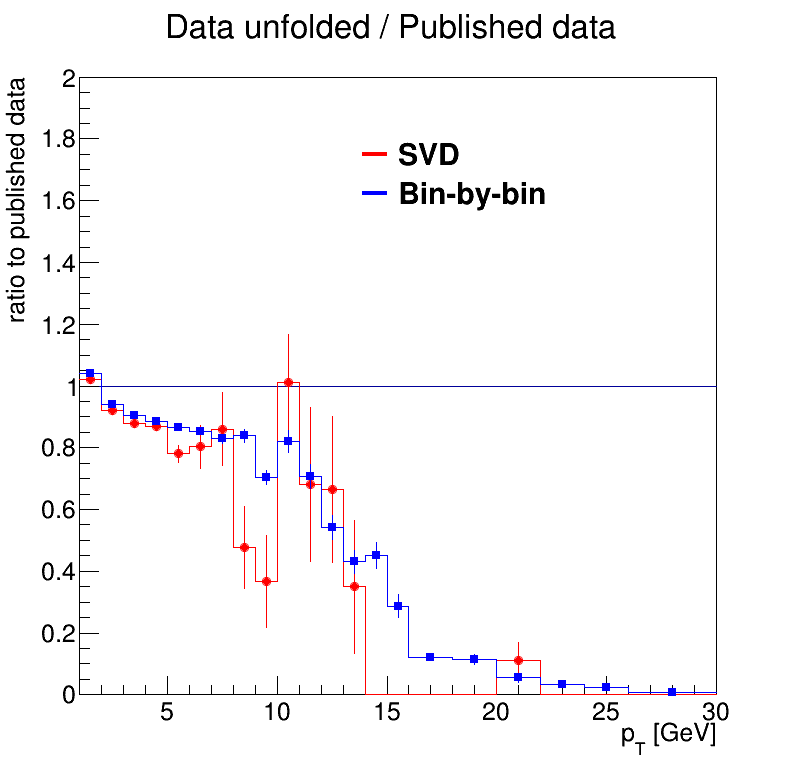

In [150]:
c= ROOT.TCanvas('c','c',800,800)


ratio_unity.Draw("histsame")
ratio_unity.SetTitle('; p_{T} [GeV]; ratio to published data')
ratio_unity.SetTitle('Data unfolded / Published data')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
ratio_data_unfolded_SVD_4_corrected.Draw('histesame')
#ratio_data_unfolded_SVD_5_corrected.Draw('histsame')
ratio_data_corrected.Draw('histesame')
#ratio_data_raw.Draw("histsame")
#ratio_data_bkgsub.Draw("histsame")
#ratio_data_unfoldedSVD4.Draw("histsame")

label = Legend("")
label.Add(ratio_data_unfolded_SVD_4_corrected,'SVD','L')
#label.Add(ratio_data_unfolded_SVD_5_corrected,'SVD k=5 + eff corr.','L')
label.Add(ratio_data_corrected,'Bin-by-bin','L')
label.Draw(.45,.85)

c.Draw()
#c.SaveAs('Comparison_Unfolded_tracking_pPb_its_4Layers_all_new_corSVD4_13b.png')
